# Lista 1 SDE

## Imports

In [3]:
using Plots
theme(:ggplot2)
using Random

## Variáveis Globais

In [4]:
# definindo parametros globais
T = 2.0 # tempo final 
t0 = 0.0
x0 = 0.25
a = 3
b = 1
dt = 0.01
N = Int(round(T/dt))

200

In [5]:
# deve funcionar dando a f certa
# talvez seja melhor fazer sem funções mesmo
# a ideia não é guardar muitos resultados 
# quando precisar guardar, melhor criar uma classe pro problema com uma 
# classe de simulação

# f recebe 2 parametros, x e um vetor com os parametros do problema
# euler recebe só a classe do problema 
function Euler(f, x0, dt, T, t0=0.0)
    N = Int(round(T/dt))
    x = Vector(undef, N+1)
    x[1] = x0 
    for i in 2:N+1
        x[i] = x[i-1] + dt*f(x[i-1]) 
    end
    return x 
end

Euler (generic function with 2 methods)

## Questão 1 

In [6]:
# como já temos todos os parâmetros para uma equação clássica
# basta simular 
function f(x,a=a,b=b)
    return (a - b*x)*x
end

f (generic function with 3 methods)

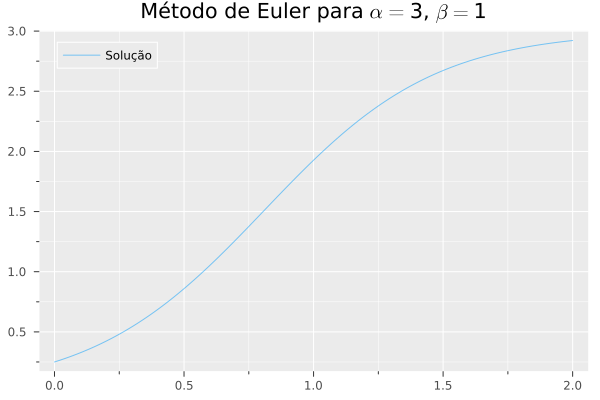

In [7]:
result = Euler(f,x0,dt,T)
ts = t0:dt:T     #seq(t0,T,by=dt)

plot(ts,result,alpha = 0.5,title="Método de Euler para \$ \\alpha =\$$a, \$ \\beta =\$$b",label="Solução")

## Questão 2

In [8]:
# agora preciso de parametros aleatórios 
# a média de cada um deles vai ser o valor definido anteriormente
# a = 2
# b = 0.25
# não vou sortear um número de seed
M = 100 # número de sorteios
sig_a = 0.2
sig_b = 0.01  
alfas = a .+ randn(M)*sig_a
betas = b .+ randn(M)*sig_b
nothing

In [9]:
# modificando a função para fazer com array ao invés de vetor (ainda não sei a diferença pro Julia)
function Euler(f, x0, dt, T, t0=0.0)
    N = Int(round(T/dt))
    x = Array{Float64}(undef, N+1,M)
    x[1,:] .= x0 
    for i in 2:N+1
        x[i,:] = x[i-1,:] + dt.*f(x[i-1,:],alfas,betas) 
    end
    return x 
end

function f(x,a=a,b=b)
    return (a .- b.*x).*x
end

f (generic function with 3 methods)

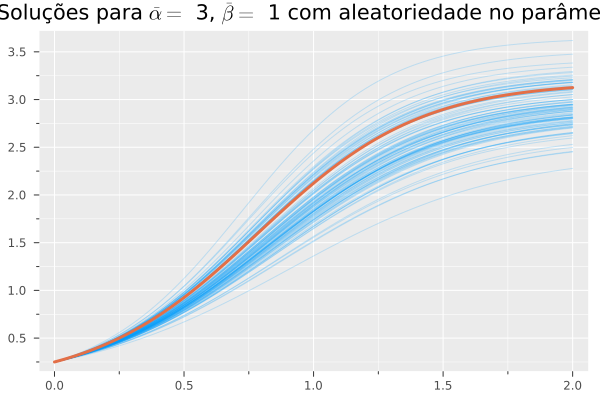

In [12]:
resultados = Euler(f,x0,dt,T)

plot(ts,resultados,alpha=0.2,label=false,title="Soluções para \$ \\bar{\\alpha}= \$$a, \$ \\bar{\\beta}= \$$b com aleatoriedade no parâmetro",color=1)
plot!(ts,resultados[:,1],color=2,label=false,linewidth=3)

## Questão 3

In [14]:
a = 3
b = 1
sig_a = 0.5
sig_b = 0.025
t0 = 0.0
x0 = 0.25
T = 2.0
dt = 0.01
N = Int(round(T/dt)) # número de passos 
M = 100 # numero de simulações 

ts = t0:dt:T

rng = MersenneTwister(1234)
nothing

In [15]:
function f(x,a=a,b=b)
    return (a - b*x)*x
end

f (generic function with 3 methods)

In [16]:
resultados = Array{Float64}(undef,N+1,M)
resultados[1,:] .= x0 

for i in 1:M
    Wt = 0 # valor inicial do passeio aleatório
    for j in 2:N+1
        Wt += sqrt(dt)*randn(rng) # gerando uma normal de média 0 e variância dt
        At = a + sig_a*sin(Wt)
        resultados[j,i] = resultados[j-1,i] + dt*f(resultados[j-1,i],At,b)
    end
end

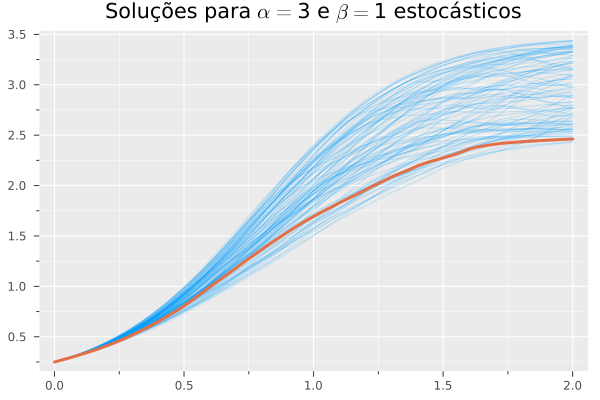

In [18]:
plot(ts,resultados,label=false,color=1,alpha=0.2,title="Soluções para \$ \\alpha = \$$a e \$ \\beta = \$$b estocásticos")
plot!(ts,resultados[:,15],linewidth=3,color=2,label=false)

### Animação :)

Achei que a aleatoriedade na curva ficou mais fácil de notar com o gif. 

┌ Info: Saved animation to C:\Users\mevel\AppData\Local\Temp\jl_FiPylUlQti.gif
└ @ Plots C:\Users\mevel\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\mevel\\AppData\\Local\\Temp\\jl_FiPylUlQti.gif")
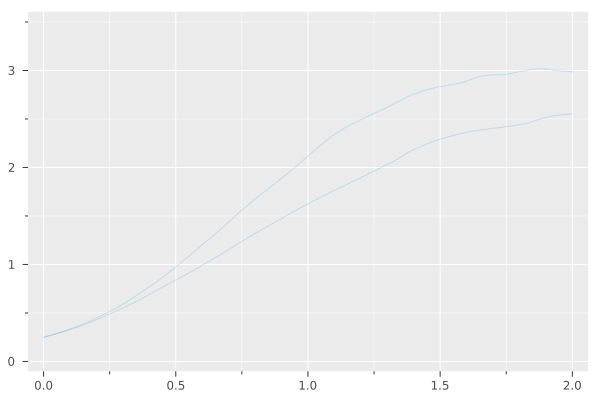

In [19]:
plot(ts,resultados[:,1],alpha=0.2,label=false)

fps = 5
@gif for i ∈ 2:M
    plot!(ts,resultados[:,i],label=false,color=1,ylims=(0,3.5),alpha=0.2)
end fps=fps

## Questão 4

Queremos resolver 

$$\frac{dX_t}{dt} = (A_t - b X_t)X_t + \sigma X_t dW_t$$

com $X_0 = x_0$.

In [20]:
# definindo novamente os parâmetros
T = 2.0 # tempo final 
t0 = 0.0
x0 = 0.25
α = 1
β = 0.1
σ = 0.25
dt = 0.01
N = Int(round(T/dt))
M = 100 # numero de simulações 
w0 = 0
nothing

In [21]:
# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

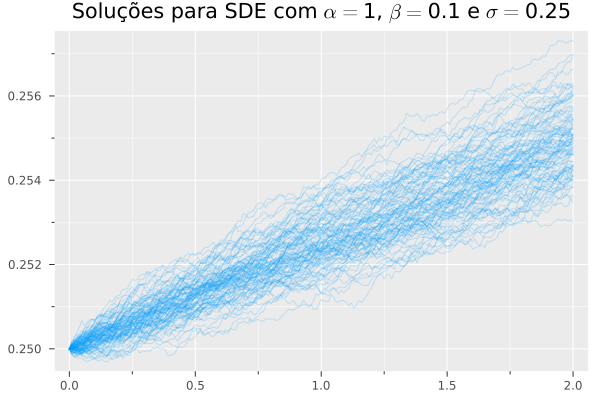

In [23]:
# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")

### Animação 

In [ ]:
plot(ts,xs[:,1],color=2,label=false)

@gif for i ∈ 2:M
    plot!(ts,xs[:,i],color=1,label=false,alpha=0.2,ylim=(0.249,0.257))
end fps = 5

### Variando um pouco os parâmetros

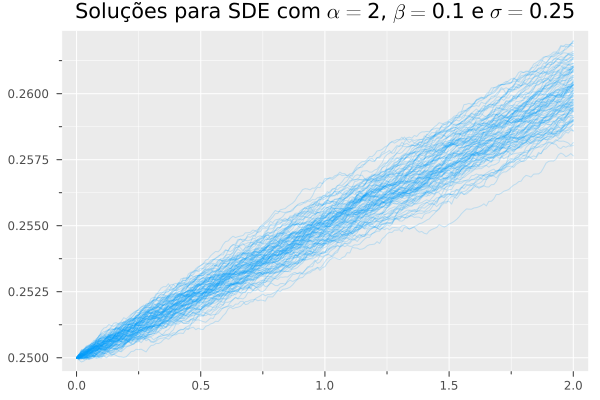

In [24]:
α = 2
β = 0.1

# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")

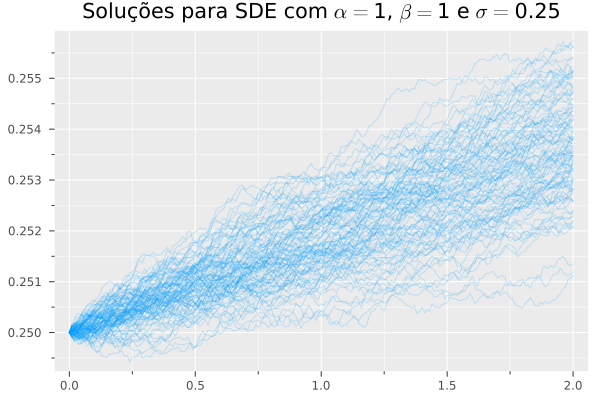

In [25]:
α = 1
β = 1

# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")

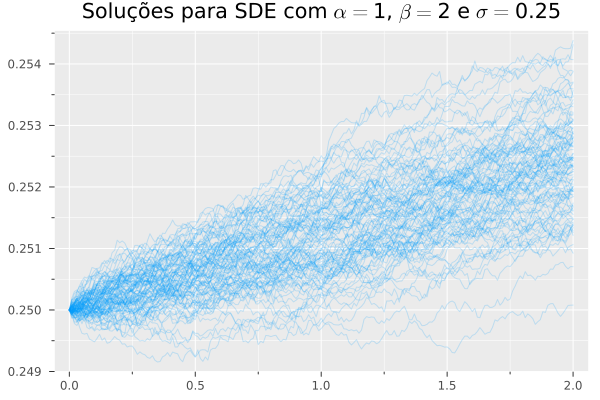

In [29]:
α = 1
β = 2
σ = 0.25
# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")

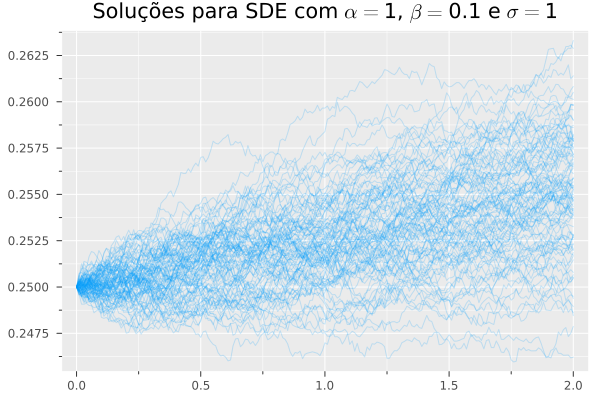

In [27]:
α = 1
β = 0.1
σ = 1

# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")

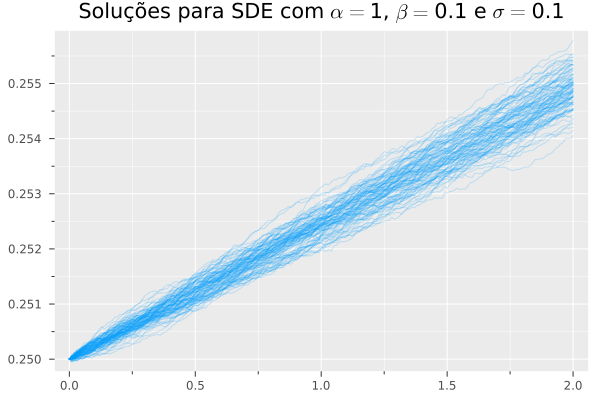

In [31]:
α = 1
β = 0.1
σ = 0.1

# simulação
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

# plot
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α, \$ \\beta =\$$β e \$ \\sigma =\$$σ")